In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r"C:\Users\Ericm\PycharmProjects\wageData\.venv\Scripts\PoliceDepartmentWagesConsolidated.csv")
df

,Year,EmployerName,Position,PositionCount,MeanTotalWages
0,2009,Carlsbad,Police Captain,3,142997.333333
1,2009,Carlsbad,Police Chief,1,186535.000000
2,2009,Carlsbad,Police Corporal,26,106819.653846
3,2009,Carlsbad,Police Lieutenant,7,135266.571429
4,2009,Carlsbad,Police Officer,66,90206.242424
...,...,...,...,...,...
691,2023,San Diego,Police Chief,1,218512.280400
692,2023,San Diego,Police Detective,262,96968.400383
693,2023,San Diego,Police Lieutenant,62,134419.481914
694,2023,San Diego,Police Officer,1283,90883.784510


In [8]:
df.columns = ['Year', 'City', 'Position', 'NumEmpls', 'MeanTotWage']
df

,Year,City,Position,NumEmpls,MeanTotWage
0,2009,Carlsbad,Police Captain,3,142997.333333
1,2009,Carlsbad,Police Chief,1,186535.000000
2,2009,Carlsbad,Police Corporal,26,106819.653846
3,2009,Carlsbad,Police Lieutenant,7,135266.571429
4,2009,Carlsbad,Police Officer,66,90206.242424
...,...,...,...,...,...
691,2023,San Diego,Police Chief,1,218512.280400
692,2023,San Diego,Police Detective,262,96968.400383
693,2023,San Diego,Police Lieutenant,62,134419.481914
694,2023,San Diego,Police Officer,1283,90883.784510


In [9]:
df['Position'].unique()

array(['Police Captain', 'Police Chief', 'Police Corporal',
       'Police Lieutenant', 'Police Officer', 'Police Sergeant',
       'Chief of Police', 'Police Agent', 'Police Detective'],
      dtype=object)

In [10]:


df['NumEmpls%Chg'] = df.groupby(['City', 'Position'])['NumEmpls'].pct_change()
df['MeanTotWage%Chg'] = df.groupby(['City', 'Position'])['MeanTotWage'].pct_change()

sorted_df = df.sort_values(by=['Position', 'Year', 'City'], ascending=[True, True, False])
#sorted_df.to_csv(r"C:\Users/Ericm\PycharmProjects\wageData\.venv\Scripts\PoliceDepartmentWagesRoC.csv")

sorted_df

,Year,City,Position,NumEmpls,MeanTotWage,NumEmpls%Chg,MeanTotWage%Chg
19,2009,Escondido,Chief of Police,1,158114.000000,NaN,NaN
6,2009,Chula Vista,Chief of Police,2,118814.500000,NaN,NaN
64,2010,Escondido,Chief of Police,1,149757.561900,0.000000,-0.052851
51,2010,Chula Vista,Chief of Police,1,199470.138200,-0.500000,0.678837
108,2011,Escondido,Chief of Police,1,143910.388400,0.000000,-0.039044
...,...,...,...,...,...,...,...
673,2023,Escondido,Police Sergeant,23,124137.620228,0.000000,0.037691
668,2023,El Cajon,Police Sergeant,19,123311.847539,0.000000,0.088062
662,2023,Coronado,Police Sergeant,7,127392.741189,0.000000,-0.030177
657,2023,Chula Vista,Police Sergeant,38,131669.852993,0.117647,0.011901


C:\Users\Ericm\AppData\Local\Temp\ipykernel_73124\1089327413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['Year'] = pd.to_numeric(position_data['Year'], errors='coerce')
C:\Users\Ericm\AppData\Local\Temp\ipykernel_73124\1089327413.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['NumEmpls%Chg'] = position_data['NumEmpls%Chg'].astype(str).str.rstrip('%').astype('float') / 100.0
C:\Users\Ericm\AppData\Local\Temp\ipykernel_73124\1089327413.py:11: SettingWithCopyWarning: 


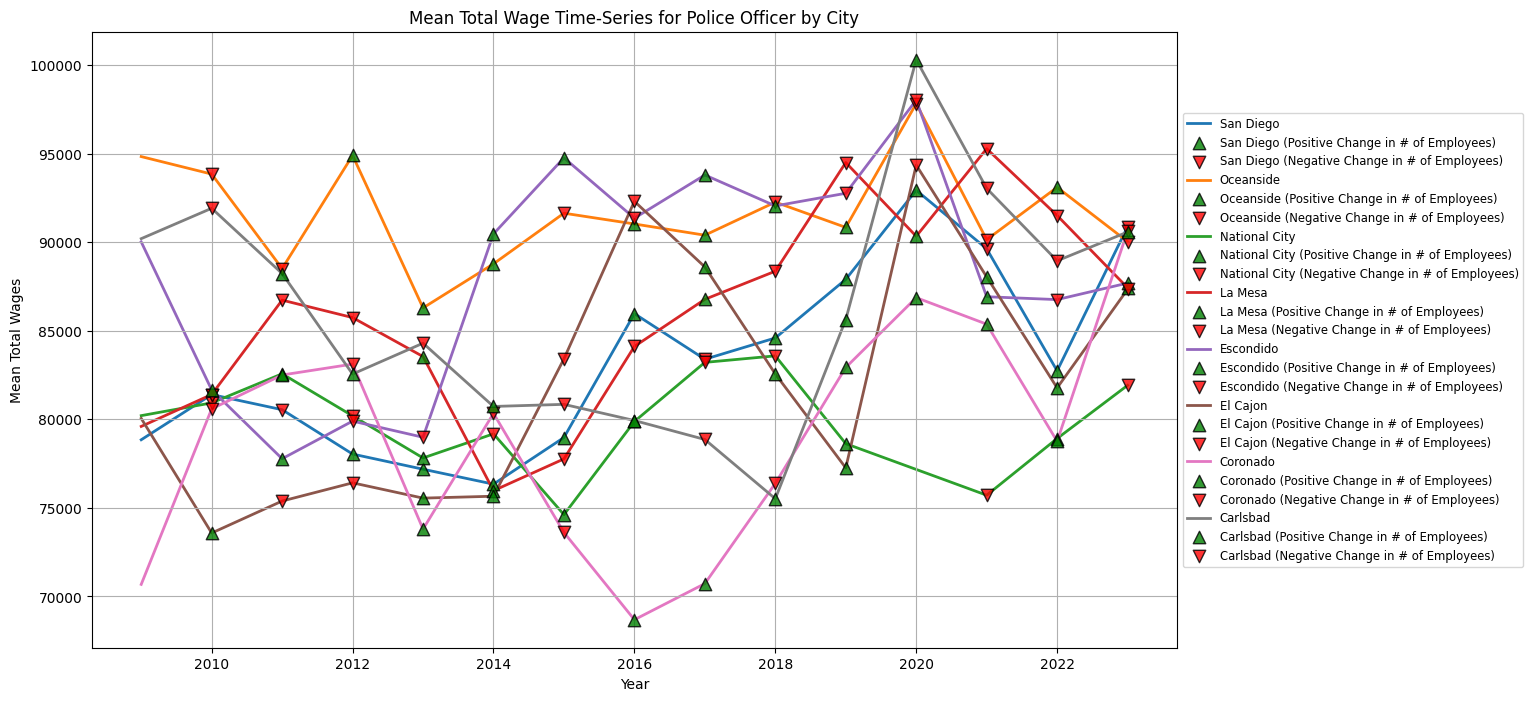

In [11]:
# Function to create a time-series plot with color-coded cities and sleek markers
def plot_wage_timeseries(df, position, save_path):
    # Filter the data for the specified position
    position_data = df[df['Position'] == position]
    
    # Convert columns to appropriate types
    position_data['Year'] = pd.to_numeric(position_data['Year'], errors='coerce')
    
    # Ensure NumEmpls%Chg is treated as a string and then converted to numeric
    position_data['NumEmpls%Chg'] = position_data['NumEmpls%Chg'].astype(str).str.rstrip('%').astype('float') / 100.0
    position_data['MeanTotWage'] = pd.to_numeric(position_data['MeanTotWage'], errors='coerce')
    
    # Get a list of cities in the dataset
    cities = position_data['City'].unique()
    
    # Plotting
    plt.figure(figsize=(14, 8))

    for city in cities:
        city_data = position_data[position_data['City'] == city]
        
        # Separate the data into positive and negative employee change
        positive_change = city_data[city_data['NumEmpls%Chg'] > 0]
        negative_change = city_data[city_data['NumEmpls%Chg'] <= 0]
        
        # Plot time-series for the city without markers on the line
        plt.plot(city_data['Year'], city_data['MeanTotWage'], label=city, linestyle='-', linewidth=2, zorder=1)
        
        # Overlay smaller markers for positive and negative employee changes with higher zorder
        plt.scatter(positive_change['Year'], positive_change['MeanTotWage'], 
                    color='green', marker='^', s=80, edgecolor='black', alpha=0.8, zorder=2, label=f'{city} (Positive Change in # of Employees)')
        plt.scatter(negative_change['Year'], negative_change['MeanTotWage'], 
                    color='red', marker='v', s=80, edgecolor='black', alpha=0.8, zorder=2, label=f'{city} (Negative Change in # of Employees)')
    
    plt.title(f'Mean Total Wage Time-Series for {position} by City')
    plt.xlabel('Year')
    plt.ylabel('Mean Total Wages')
    
    # Place the legend outside the plot area
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
    
    plt.grid(True)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')  # Use bbox_inches='tight' to avoid cutting off the legend
        
    plt.show()

# Create the time-series plot for "Police Officer"
plot_wage_timeseries(sorted_df, "Police Officer", r"C:\Users\Ericm\PycharmProjects\wageData\.venv\Scripts\WagesNumEmployeesViz.pdf")
